In [1]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
# Step 2: Import Dataset
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('Mall_Customers.csv')
print("First 5 rows of the dataset:")
print(df.head())
print("\n-----------------------------------\n")
print("Dataset Information:")
df.info()
print("\n-----------------------------------\n")
print("Missing Values Check:", df.isnull().sum().sum()) # Should be 0

Saving Mall_Customers.csv to Mall_Customers.csv
First 5 rows of the dataset:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

-----------------------------------

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1

In [4]:
# Step 3: Feature Selection and Scaling
# We are selecting the most relevant features for segmentation
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

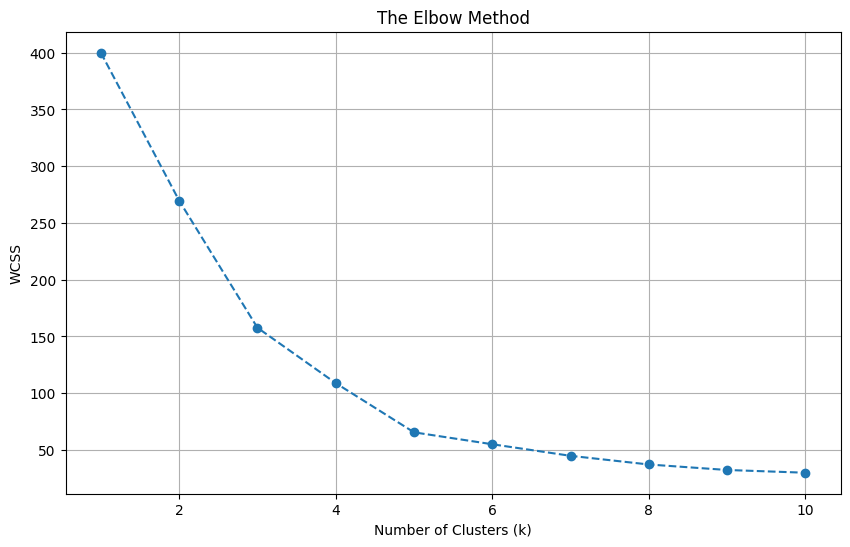


Conclusion: The 'elbow' point in the graph is at k=5, which is the optimal number of clusters.


In [5]:
# Step 4: Finding the Optimal Number of Clusters using the Elbow Method
# WCSS = Within-Cluster Sum of Squares
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_) # inertia_ gives the WCSS value
# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()
print("\nConclusion: The 'elbow' point in the graph is at k=5, which is the optimal number of clusters.")

In [6]:
# Step 5: Training the K-Means Model with k=5
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X_scaled)
df['Cluster'] = y_kmeans

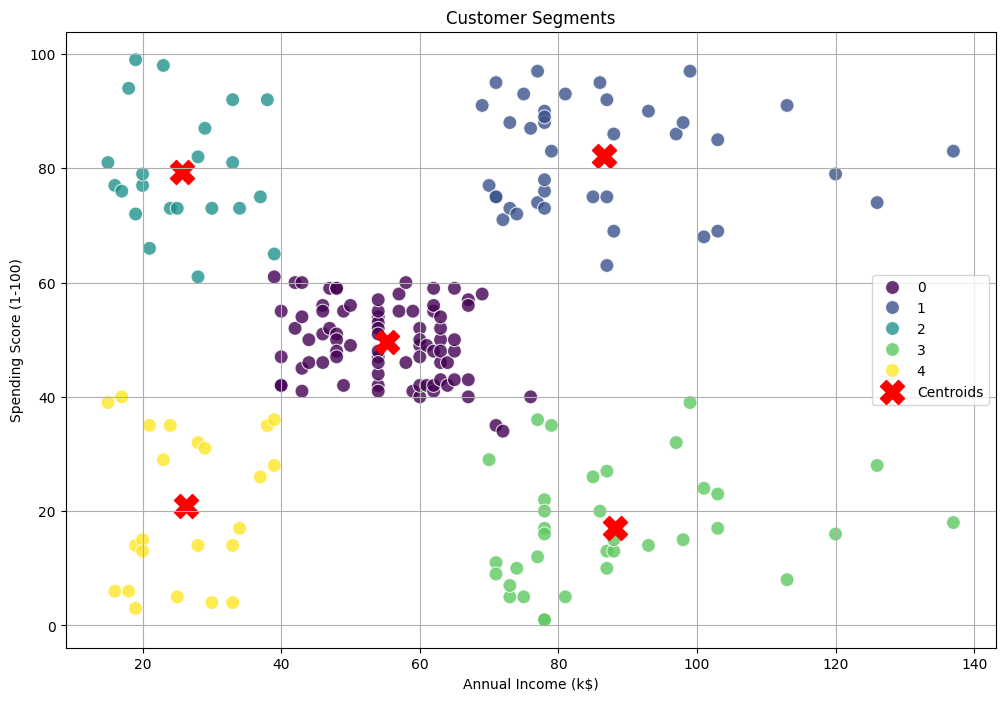

In [7]:
# Step 6: Visualizing the Customer Segments
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis', s=100, alpha=0.8, legend='full')
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()